In [21]:
from numpy import random
class PhotoMetricDistortion(object):
    """Apply photometric distortion to image sequentially, every transformation
    is applied with a probability of 0.5. The position of random contrast is in
    second or second to last.
    1. random brightness
    2. random contrast (mode 0)
    3. convert color from BGR to HSV
    4. random saturation
    5. random hue
    6. convert color from HSV to BGR
    7. random contrast (mode 1)
    8. randomly swap channels
    Args:
        brightness_delta (int): delta of brightness.
        contrast_range (tuple): range of contrast.
        saturation_range (tuple): range of saturation.
        hue_delta (int): delta of hue.
    """

    def __init__(self,
                 brightness_delta=32,
                 contrast_range=(0.5, 1.5),
                 saturation_range=(0.5, 1.5),
                 hue_delta=18):
        self.brightness_delta = brightness_delta
        self.contrast_lower, self.contrast_upper = contrast_range
        self.saturation_lower, self.saturation_upper = saturation_range
        self.hue_delta = hue_delta

    def __call__(self, results):
        img = results['img']
        # random brightness
        if False: # random.randint(2):
            print('Random Brightness')
            delta = random.uniform(-self.brightness_delta,
                                   self.brightness_delta)
            #delta= self.brightness_delta
            img += delta

        # mode == 0 --> do random contrast first
        # mode == 1 --> do random contrast last
        mode = random.randint(2)
        if mode == 1:
            if False: # random.randint(2):
                print('Random Contrast')
                alpha = random.uniform(self.contrast_lower,
                                       self.contrast_upper)
                img *= alpha

        # convert color from BGR to HSV
        img = mmcv.bgr2hsv(img)

        # random saturation
        if False: #  random.randint(2):
            print('Random Saturation')
            img[..., 1] *= random.uniform(self.saturation_lower,
                                          self.saturation_upper)

        # random hue
        if False: #  random.randint(2):
            print('Random Hue')
            img[..., 0] += random.uniform(-self.hue_delta, self.hue_delta)
            img[..., 0][img[..., 0] > 360] -= 360
            img[..., 0][img[..., 0] < 0] += 360

        # convert color from HSV to BGR
        img = mmcv.hsv2bgr(img)

        # random contrast
        if mode == 0:
            if False: #  random.randint(2):
                print('Random Contrast')
                alpha = random.uniform(self.contrast_lower,
                                       self.contrast_upper)
                img *= alpha

        # randomly swap channels
        #if random.randint(2):
        #    print('Random Channel Swap')
        #    img = img[..., random.permutation(3)]

        results['img'] = img
        return results

    def __repr__(self):
        repr_str = self.__class__.__name__
        repr_str += ('(brightness_delta={}, contrast_range={}, '
                     'saturation_range={}, hue_delta={})').format(
                         self.brightness_delta, self.contrast_range,
                         self.saturation_range, self.hue_delta)
        return repr_str

0.0 1.0
(1024, 1024, 4)
0.0 1.0
Random Hue
0.0 1.0
0.0 1.0


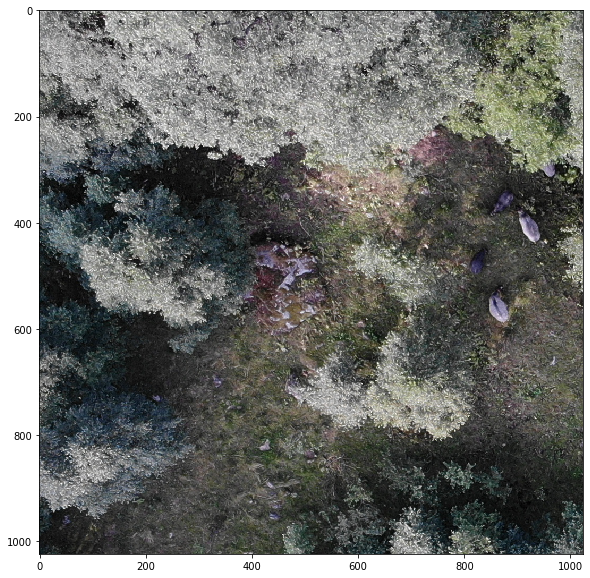

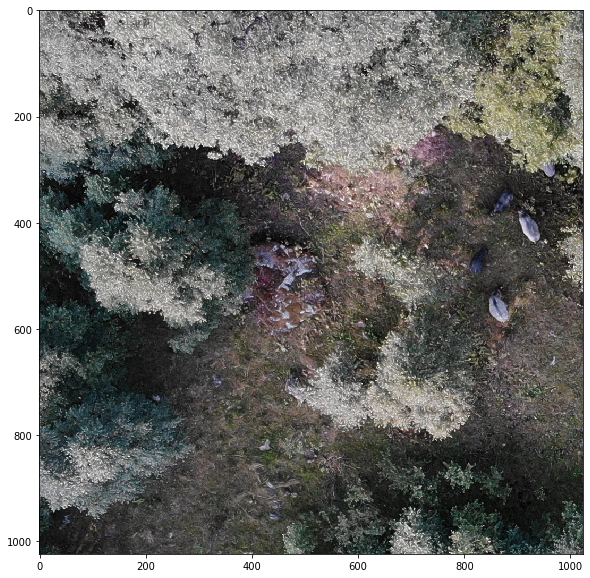

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import mmcv

img_name = '../../../data/data_external/train2020_4d_crop1024/aug19_102MEDIA_DJI_0314_CROPPED_[512][512][1024][1024].npy'
img = mmcv.imread(np.load(img_name))
img = img.astype(np.float32)

img = img/255
print(np.min(img), np.max(img))
print(np.shape(img))

plt.figure(figsize=(10,10))
plt.imshow(img[:,:,:3])
print(np.min(img), np.max(img))

a = PhotoMetricDistortion()
res = a.__call__({'img':img,
           'img_shape': img.shape,
           'ori_shape': img.shape,
           'gt_boxes': [],
           'gt_labels':[],
           'bbox_fields': []})

print(np.min(res['img']), np.max(res['img']))


res['img'] = res['img'] - np.min(res['img'])
res['img'] = res['img'] /np.max(res['img'])

print(np.min(res['img']), np.max(res['img']))

plt.figure(figsize=(10,10))
plt.imshow(res['img'][:,:,:3])


In [25]:
np.max(img)

1.0

In [86]:
a.contrast_lower

0.5

In [87]:
a.contrast_upper

1.5

In [13]:
np.shape(img)

(1024, 1024, 3)